# Estimation of parameters from Beta distribution

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data <- read_csv("podatki_1.txt", col_names = FALSE)
head(data)

Rows: 100 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1
<dbl>
0.1391262
0.2033767
0.6094788
0.4325735
0.7676645
0.1265060


## Maximum Likelihood Estimation (MLE)

In [5]:
neg_log_likelihood <- function(params) {
    a = params[1]
    b = params[2]

    # check if parameters are valid
    if (a <= 0 || b <= 0) {
        return(Inf)
    }

    # compute the negative log-likelihood
    - sum(dbeta(data$X1, a, b, log = TRUE))
}

# intialization
params_init <- c(1, 1)

# optimize the negative log-likelihood function
result <- optim(par = params_init, fn = neg_log_likelihood, method = "L-BFGS-B", lower = c(0, 0))

# extract the estimated parameters
a_ML = result$par[1]
b_ML = result$par[2]

cat("Estimated parameters:\n")
cat("a_ML =", a_ML, "\n")
cat("b_ML =", b_ML, "\n")

Estimated parameters:
a_ML = 2.432755 
b_ML = 3.81518 


## Method of Moments

In [9]:
n = length(data$X1)
M1 = mean(data$X1)
M2 = mean(data$X1^2)

a_MM = M1 * (M1 - M2) / (M2 - M1^2)
b_MM = (M1 - M2)*(1 - M1) / (M2 - M1^2)

cat("Method of moments estimates:\n")
cat("a_MM =", a_MM, "\n")
cat("b_MM =", b_MM, "\n")

Method of moments estimates:
a_MM = 2.392224 
b_MM = 3.766828 


In [44]:
cat(M1, M2)

0.3884078 0.184042

### Plot the ellipses of the Confidence Region from MM

In [ ]:
# install.packages("numDeriv")
library(numDeriv)

In [ ]:
# Covariance matrix
var_X = M2 - M1^2
cov_X_X2 = mean(data$X1^3) - M1*M2
var_X2 = mean(data$X1^4) - M2^2

Sigma = matrix(c(var_X, cov_X_X2, cov_X_X2, var_X2), nrow = 2, ncol = 2)

# Jacobian matrix of g function
g <- function(x) {
    c(x[1] * (x[1] - x[2]) / (x[2] - x[1]^2),(x[1] - x[2])*(1 - x[1]) / (x[2] - x[1]^2))
}

J = jacobian(g, c(M1, M2)) # I cheated a bit using this function but typing by hand what the partial derivatives is a bit discouraging..

V = solve(J) %*% Sigma %*% t(solve(J)) / n # Division by n for asymptotic covariance matrix as needed in the ellipse function

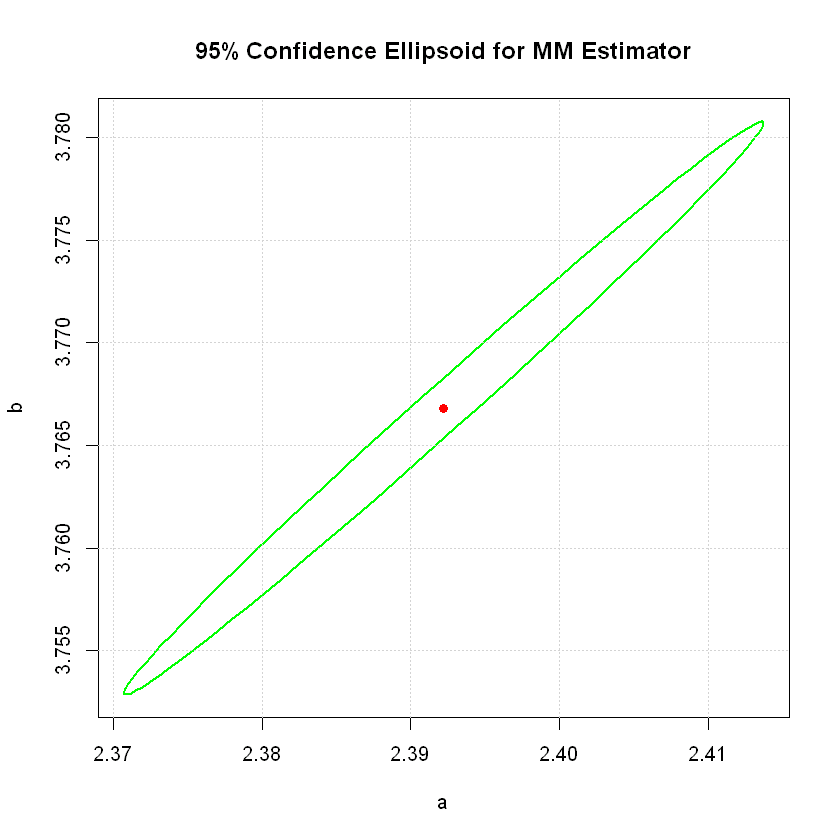

In [42]:
library(ellipse)

# Compute ellipse points
confidence_level <- 0.95

ellipse_points <- ellipse(V, centre = c(a_MM, b_MM), level = confidence_level) # automatically treat the chi square distribution as a confidence level

# Plot
plot(ellipse_points, type = "l", col = "green", lwd = 2, xlab = "a", ylab = "b", main = "95% Confidence Ellipsoid for MM Estimator")
points(a_MM, b_MM, pch = 19, col = "red")  # MM estimate
grid()